## Part 1

Firstly we do the monte carlo simulation to find the mean at least tiles to make percolation(assume the result is $k$) 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

def dfs(grid, visited, x, y, n) -> bool: 
    DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]   
    stack = [(x, y)]
    while stack:
        cx, cy = stack.pop()
        if visited[cx, cy]:
            continue
        visited[cx, cy] = True
        for dx, dy in DIRECTIONS:
            nx, ny = cx + dx, cy + dy
            if (0 <= nx < n and 0 <= ny < n) and not visited[nx, ny] and grid[nx, ny] == 1:
                if nx == n - 1:  
                    return True
                stack.append((nx, ny))
    return False

def percolates(grid, n) -> bool:
    visited = np.zeros((n, n), dtype=bool)
    for col in range(n):
        if grid[0, col] == 1 and not visited[0, col] and dfs(grid, visited, 0, col, n):
            return True
    return False

def monte_carlo_simulation(n) -> Tuple[float, int]:
    grid = np.zeros((n, n), dtype=int)  
    open_sites = 0
    while True:
        x, y = random.randint(0, n - 1), random.randint(0, n - 1)
        while grid[x, y] == 1:  
            x, y = random.randint(0, n - 1), random.randint(0, n - 1)
        grid[x, y] = 1
        open_sites += 1
        if percolates(grid, n):
            return open_sites / (n * n), open_sites  

def estimate_percolation_threshold(n, trials)-> Tuple[float, int]:
    thresholds = []
    nums = []
    for _ in range(trials):
        threshold, num = monte_carlo_simulation(n)
        thresholds.append(threshold)
        nums.append(num)
    return np.mean(thresholds), int(np.mean(nums))



In [7]:
n = 20  
trials = 1000


estimated_threshold, mean_nums_tile = estimate_percolation_threshold(n, trials)
print(f"The Percolation threshold for a {n} * {n} grid: {estimated_threshold}")

The Percolation threshold for a 20 * 20 grid: 0.5916075000000001


From above we know that if $n=20$, $k=237$

In [2]:
n = 50  
trials = 1000
estimated_threshold, mean_nums_tile = estimate_percolation_threshold(n, trials)
print(f"The Percolation threshold for a {n} * {n} grid: {estimated_threshold}")

The Percolation threshold for a 50 * 50 grid: 0.5917344000000001


From above we know that if $n=50$, $k=1480$

In [7]:
n = 100 
trials = 100


estimated_threshold, mean_nums_tile = estimate_percolation_threshold(n, trials)
print(f"The Percolation threshold for a {n} * {n} grid: {estimated_threshold}")

The Percolation threshold for a 100 * 100 grid: 0.594759


## Part 2
### Task A

$P(\sigma=+1|\boldsymbol{\sigma}_ {-k}  )$
$=\dfrac{P(\sigma=+1,\boldsymbol{\sigma}_ {-k}  )}{P(\boldsymbol{\sigma}_{-k} )}$

$=\dfrac{P(\sigma=+1,\boldsymbol{\sigma}_ {-k}  )}{P(\boldsymbol{\sigma}_{-k},\sigma_k=+1)+P(\boldsymbol{\sigma}_{-k},\sigma_k=-1)}$

<br>

Let $\boldsymbol{\sigma_1}=(\boldsymbol{\sigma_{-k} },\sigma_k=+1),\boldsymbol{\sigma_2}=(\boldsymbol{\sigma_{-k} },\sigma_k=-1)$

$H(\boldsymbol{\sigma_1 })=\sum_{(v,w)\in \Omega}{\sigma_v \sigma_w}$

$=H(\boldsymbol{\sigma_k} )-\sum_{v\sim k}{\sigma_k \sigma_v}$

$=H(\boldsymbol{\sigma_k} )-\sum_{v\sim k}{\sigma_v}$

Similarly,$H(\boldsymbol{\sigma_2 })=H(\boldsymbol{\sigma_k} )+\sum_{v\sim k}{\sigma_v}$

$\Rightarrow H(\boldsymbol{\sigma_2 })=H(\boldsymbol{\sigma_1 })+2\sum_{v\sim k}{\sigma_v}$

<br>

$\therefore P(\sigma_k=+1|\sigma_{-k})$

$=\dfrac{e^{-\beta H(\boldsymbol{\sigma_1}) } }{e^{-\beta H(\boldsymbol{\sigma_1}) } +e^{-\beta H(\boldsymbol{\sigma_2}) } }$

$=\dfrac{e^{-\beta H(\boldsymbol{\sigma_1}) } }{e^{-\beta H(\boldsymbol{\sigma_1}) } +e^{-\beta H(\boldsymbol{\sigma_1 })+2\sum_{v\sim k}{\sigma_v} } }$

$=\dfrac{1}{1+e^{-2\beta\sum_{v\sim k}{\sigma_v} } }$

<br>

$\therefore P(\sigma_k=-1|\sigma_{-k})=1-P(\sigma_k=+1|\sigma_{-k})$

=$1-\dfrac{1}{1+e^{-2\beta\sum_{v\sim k}{\sigma_v} } }$

=$\dfrac{e^{-2\beta\sum_{v\sim k}{\sigma_v} }}{1+e^{-2\beta\sum_{v\sim k}{\sigma_v} } }$

$=\dfrac{1}{1+e^{2\beta\sum_{v\sim k}{\sigma_v} }}$


$\therefore P(\sigma=+1|\boldsymbol{\sigma}_ {-k}  ) = \dfrac{1}{1+e^{-2\beta\sum_{v\sim k}{\sigma_v} } }, \quad P(\sigma_k=-1|\sigma_{-k})=\dfrac{1}{1+e^{2\beta\sum_{v\sim k}{\sigma_v} }}$

### Task B
> Method: Since the complexity of simulating the result directly is so big(which is $\Theta(2^n)$), we adopt the method of fix one electron and determine its status according to the condition probability. As the step becoming larger, the result of simulation become very close to the real result.
#### Phenomenon Explaination

- $\beta = -1$: Likely displays anti-ferromagnetic alignment or random configurations if constraints are violated.
- $\beta = 0$: Completely disordered state.
- $\beta = 0.441$: Clear indication of critical behavior with large spin clusters forming.
- $\beta = 0.8$: Fully ordered ferromagnetic phase with aligned spins.


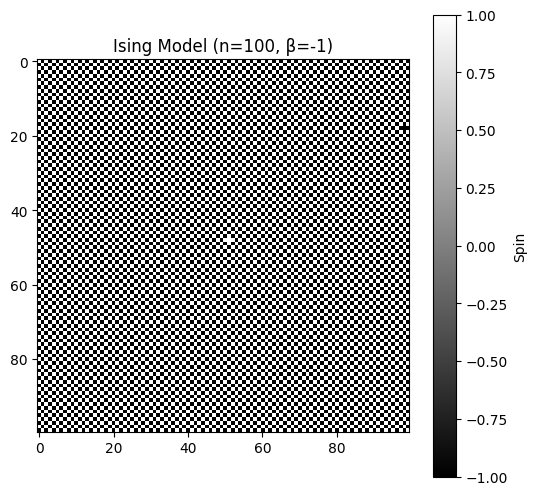

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm

class IsingModel:
    def __init__(self, n, beta):
        self.n = n  
        self.beta = beta  
        self.lattice = np.random.choice([-1, 1], size=(n, n))  
    def energy_change(self, i, j):
        neighbors = (
            self.lattice[(i - 1) % self.n, j]
            + self.lattice[(i + 1) % self.n, j]
            + self.lattice[i, (j - 1) % self.n]
            + self.lattice[i, (j + 1) % self.n]
        )
        prob = 1 / (1 + np.exp(-2 * self.beta * neighbors))
        self.lattice[i, j] = 1 if np.random.rand() < prob else -1
    def metropolis_step(self):
        i = np.random.randint(0, self.n)
        j = np.random.randint(0, self.n)
        self.energy_change(i, j)
    def simulate(self, steps):
        for _ in tqdm(range(steps)):
            self.metropolis_step()
def run_simulation(args):
    n, beta, steps = args
    model = IsingModel(n, beta)
    model.simulate(steps)
    return model.lattice
  
n = 100  
betas = [-1, 0, 0.441, 0.8]  
steps = 100000000

for beta in betas:
    model = IsingModel(n, beta)
    model.simulate(steps)
    plt.figure(figsize=(6, 6))
    plt.title(f"Ising Model (n={n}, β={beta})")
    plt.imshow(model.lattice, cmap="gray")
    plt.colorbar(label="Spin")
    plt.show()

### Task C
#### Phenomenon Explaination
- Larger lattice size $n=300$ emphasizes scale invariance near the critical point ($\beta = 0.441$).
- $\beta = -5$: Similar to $\beta = -1$ but with more pronounced anti-ferromagnetic order.
- $\beta = 0.2$: Disordered state with random spins due to high temperature.
- $\beta = 0.441$: Critical behavior with even larger spin clusters compared to $n=100$.
- $\beta = 0.6$: Ordered state but less pronounced compared to $\beta = 0.8$ due to proximity to the critical point.


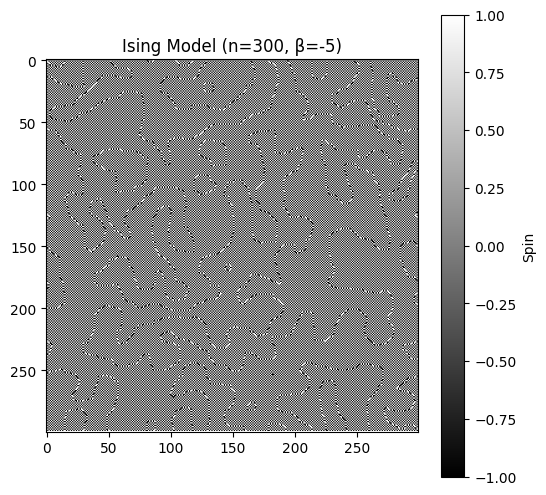

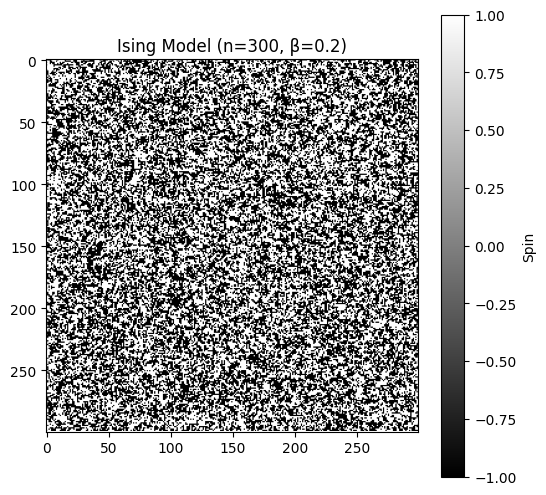

KeyboardInterrupt: 

In [8]:
n = 300
betas = [-5, 0.2, 0.441, 0.6]
steps = 100000000

for beta in betas:
    model = IsingModel(n, beta)
    model.simulate(steps)
    plt.figure(figsize=(6, 6))
    plt.title(f"Ising Model (n={n}, β={beta})")
    plt.imshow(model.lattice, cmap="gray")
    plt.colorbar(label="Spin")
    plt.show()

### Conclusion of Task B C
#### Different $\beta$ Determine Defferent distribution

1. **At Low β ($\beta < \beta_c$):**
   - Low $\beta$ corresponds to high temperatures.
   - Spins are disordered, leading to a random distribution of up and down spins.
   - Magnetization is near zero due to thermal fluctuations overwhelming the spin interactions.

2. **At Critical β ($\beta = \beta_c \approx 0.441$):**
   - The system approaches a critical point.
   - The lattice displays large regions (clusters) of aligned spins with growing correlation length.
   - This corresponds to the onset of a phase transition.
   - Magnetization fluctuates significantly, as the system transitions from disordered (paramagnetic) to ordered (ferromagnetic).

3. **At High β ($\beta > \beta_c$):**
   - High $\beta$ corresponds to low temperatures.
   - Spins are ordered, forming large domains of aligned spins.
   - The system exhibits spontaneous magnetization due to the dominance of interaction energy over thermal energy.

#### Physical Explaination
1. **Energy and Entropy Competition:**
   - At low temperatures ($\beta > \beta_c$), the system minimizes its energy by aligning spins, resulting in an ordered state (ferromagnetic phase).
   - At high temperatures ($\beta < \beta_c$), the system maximizes its entropy, leading to a disordered state (paramagnetic phase).

2. **Critical Behavior:**
   - At $\beta_c$, the system undergoes a second-order phase transition.
   - Near the critical point, the correlation length (the size of regions where spins are aligned) diverges, and the system shows scale-invariant behavior.

3. **Observed Phase Transition:**
   - For $\beta = 0$, the spins are completely random due to maximum entropy.
   - For negative $\beta$, the system prefers anti-ferromagnetic alignment, where neighboring spins oppose each other (not commonly discussed in ferromagnetic Ising simulations).
   - The 2D Ising model shows a **second-order phase transition** at a critical temperature ($T_c$, or $\beta_c$).
